In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Perform initial data checks to identify the number of rows and columns in the dataset.


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Identify and display the count of null values in the 'Age' and 'Cabin' columns.


In [5]:
df.Age.isnull().sum()

177

In [6]:
df.Cabin.isnull().sum()

687

### Task 2: Null Value Imputation


2.1 Fill the missing values in the 'Age' column using the mean value.

In [7]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [8]:
df.Age.isnull().sum()

0

2.2 Fill the missing values in the 'Fare' column using the median value.

In [9]:
df.Fare.isnull().sum()

0

In [10]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

2.3 Fill the missing values in the 'Embarked' column with the most common value ('S').

In [11]:
df.Embarked.fillna('S',inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.Embarked.isnull().sum()

0

### Task 3: Feature Engineering
3.1 Convert the 'Age' column to an integer type.

In [14]:
df.Age.dtype

dtype('float64')

In [15]:
df['Age'] = df.Age.astype(int)

In [16]:
df.Age.dtype

dtype('int32')

3.2 Create a new binary feature 'Cabin_Exist' indicating the presence or absence of cabin information.

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [18]:
df['Cabin_Exist'] = ~df.Cabin.isnull()

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Exist
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False


3.3 Group the 'Age' and 'Fare' columns into quartiles, creating new features 'Age_Group' and 'Fare_range'.


In [20]:
df['Age_Group'] = pd.qcut(df.Age, q=4, labels=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Exist,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,2


In [21]:
df['Fare_Range'] = pd.qcut(df.Fare,q=4,labels=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Exist,Age_Group,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,2,1


3.4 Create a 'Family' feature by combining 'Parch' and 'SibSp'.


In [22]:
df['Family'] = df['SibSp'] + df['Parch']

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Exist,Age_Group,Fare_Range,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,True,3,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,True,2,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,2,1,0


3.5 Perform feature selection by dropping irrelevant columns.

In [24]:
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1, inplace=True)

In [25]:
df.head()

,Survived,Pclass,Sex,Embarked,Cabin_Exist,Age_Group,Fare_Range,Family
0,0,3,male,S,False,0,0,1
1,1,1,female,C,True,3,3,1
2,1,3,female,S,False,1,1,0
3,1,1,female,S,True,2,3,1
4,0,3,male,S,False,2,1,0


### Task 4: Data Encoding
4.1 Encode categorical data into binary form using one-hot encoding.

In [26]:
df = pd.get_dummies(data=df, columns=['Sex', 'Embarked'], drop_first=True)

In [27]:
df.head()

,Survived,Pclass,Cabin_Exist,Age_Group,Fare_Range,Family,Sex_male,Embarked_Q,Embarked_S
0,0,3,False,0,0,1,1,0,1
1,1,1,True,3,3,1,0,0,0
2,1,3,False,1,1,0,0,0,1
3,1,1,True,2,3,1,0,0,1
4,0,3,False,2,1,0,1,0,1


### Task 5: Data Scaling
5.1 Apply MinMaxScaler to scale the dataset and normalize features for model training.

In [28]:
y = df['Survived']

In [29]:
df.drop('Survived',axis=1, inplace=True)

In [30]:
X=df

In [31]:
X.head()

,Pclass,Cabin_Exist,Age_Group,Fare_Range,Family,Sex_male,Embarked_Q,Embarked_S
0,3,False,0,0,1,1,0,1
1,1,True,3,3,1,0,0,0
2,3,False,1,1,0,0,0,1
3,1,True,2,3,1,0,0,1
4,3,False,2,1,0,1,0,1


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=4)


In [34]:
X_train.shape

(623, 8)

In [35]:
X_test.shape

(268, 8)

In [36]:
y_train.shape

(623,)

In [37]:
y_test.shape

(268,)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train) #(learn the parameters from the data) and transform the data.

In [41]:
X_train

array([[0.        , 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.        , 0.66666667, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.        ]])

In [42]:
X_test = scaler.transform(X_test) # It doesn't recompute the parameters; it uses the parameters learned during the fit_transform step.

In [43]:
X_test

array([[1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

### Task 6: Model Training and Evaluation
6.1 Train a Logistic Regression model on the preprocessed data.

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model= LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
pred = model.predict(X_test)

In [48]:
pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

6.2 Evaluate the model's accuracy.



In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, pred)

0.8208955223880597

6.3 Calculate the AUC score of the model.

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
y_score = model.predict_proba(X_test)[:,1]

In [53]:
roc_auc_score(y_test, y_score)

0.8683520599250936

In [54]:
from sklearn.metrics import precision_score

In [55]:
precision_score(y_test,pred)

0.7386363636363636

In [56]:
from sklearn.metrics import recall_score

In [57]:
recall_score(y_test,pred)

0.7222222222222222

In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_score(y_test,pred)

0.7303370786516853

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,pred)

array([[155,  23],
       [ 25,  65]], dtype=int64)

In [70]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

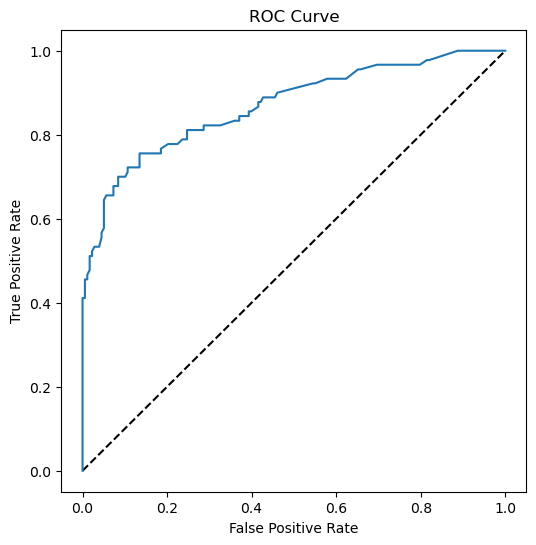

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [76]:
from sklearn. metrics import classification_report

In [79]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       178
           1       0.74      0.72      0.73        90

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



### Task 7: Conclusion
### 7.1 Summarize the key findings from the exploration, feature engineering, and model training process.

### 7.2 Discuss any insights gained and potential improvements for future analysis.